## Case Study: How Does a Bike-Share Navigate Speedy Success?
This case study is a capstone project which is  a partial fufilment of a Google Analytics Professional Certificate,

## Introduction
Welcome to the Cyclistic bike-share analysis case study! In this case study, you will perform many real-world tasks of a junior data analyst. You will work for a fictional company, Cyclistic, and meet different characters and team members. In order to answer the key business questions, you will follow the steps of the data analysis process: **ask, prepare, process, analyze, share, and act.** Along the way, the Case Study Roadmap tables — including guiding questions and key tasks — will help you stay on the right path.
By the end of this lesson, you will have a portfolio-ready case study. Download the packet and reference the details of this case study anytime. Then, when you begin your job hunt, your case study will be a tangible way to demonstrate your knowledge and skills to potential employers.

## Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## ASK PHASE
Three questions will guide the future marketing program:

1.How do annual members and casual riders use Cyclistic bikes differently?
2.Why would casual riders buy Cyclistic annual memberships?
3.How can Cyclistic use digital media to influence casual riders to become members?

### Business Task
Our objective is to analyse how annual members and casual riders use Cyclistic bikes differently,why would casual riders buy Cyclistic annual memberships and how can Cyclistic use digital media to influence casual riders to become members.

## PREPARE PHASE
data cleaning and manipulation
observe and familiarize with data
check for null & missing values
Perform sanity check

In [1]:
#import neccessary packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the datasets

q1_2020 = pd.read_csv('data/Divvy_Trips_2020_Q1.csv')
q4_2019 = pd.read_csv('data/Divvy_Trips_2019_Q4.csv')
q3_2019 = pd.read_csv('data/Divvy_Trips_2019_Q3.csv')
q2_2019 = pd.read_csv('data/Divvy_Trips_2019_Q2.csv')




#q3_2019


In [116]:
q1_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member


### PROCESS PHASE
1. Check the data for errors. 
2. Choose your tools. 
3. Transform the data so you can work with it effectively. 
4. Document the cleaning process.

In [3]:
 

#renaming to be consistent with q1_2020

q3_2019.rename(columns=
               {"trip_id": "ride_id",
                "bikeid" : "rideable_type",
               "start_time": "started_at",
               "end_time": "ended_at",
               "to_station_id" : "end_station_id",
               "from_station_id":"start_station_id",
               "from_station_name" :"start_station_name",
               "to_station_name" :"end_station_name",
               "usertype":"member_casual"},inplace=True)

q4_2019.rename(columns=
               {"trip_id": "ride_id",
                "bikeid" : "rideable_type",
               "start_time": "started_at",
               "end_time": "ended_at",
               "to_station_id" : "end_station_id",
               "from_station_id":"start_station_id",
               "from_station_name" :"start_station_name",
               "to_station_name" :"end_station_name",
               "usertype":"member_casual"},inplace=True)

 


q2_2019.rename(columns=
               {"01 - Rental Details Rental ID": "ride_id",
                "01 - Rental Details Bike ID" : "rideable_type",
               "01 - Rental Details Local Start Time": "started_at",
               "01 - Rental Details Local End Time": "ended_at",
               "03 - Rental Start Station ID" : "end_station_id",
               "02 - Rental End Station ID":"start_station_id",
               "03 - Rental Start Station Name" :"start_station_name",
               "02 - Rental End Station Name" :"end_station_name",
               "User Type":"member_casual"},inplace=True)


In [4]:
#
q3_2019['ride_id']=q3_2019['ride_id'].astype('str')
q3_2019['rideable_type']=q3_2019['rideable_type'].astype('str')
q4_2019['ride_id']=q4_2019['ride_id'].astype('str')
q4_2019['rideable_type']=q4_2019['rideable_type'].astype('str')
q2_2019['ride_id']=q2_2019['ride_id'].astype('str')
q2_2019['rideable_type']=q2_2019['rideable_type'].astype('str')

In [5]:
q3_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1640718 non-null  object 
 1   started_at          1640718 non-null  object 
 2   ended_at            1640718 non-null  object 
 3   rideable_type       1640718 non-null  object 
 4   tripduration        1640718 non-null  object 
 5   start_station_id    1640718 non-null  int64  
 6   start_station_name  1640718 non-null  object 
 7   end_station_id      1640718 non-null  int64  
 8   end_station_name    1640718 non-null  object 
 9   member_casual       1640718 non-null  object 
 10  gender              1353368 non-null  object 
 11  birthyear           1362624 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 150.2+ MB


In [6]:
#the next thing is to merge the datasets in to one named all_trips
all_trips= pd.merge(left=q2_2019,right=q3_2019,how='outer')
all_trips= pd.merge(left=all_trips,right=q4_2019,how='outer')
all_trips= pd.merge(left=all_trips,right=q1_2020,how='outer')

In [7]:
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,01 - Rental Details Duration In Seconds Uncapped,end_station_id,start_station_name,start_station_id,end_station_name,member_casual,Member Gender,05 - Member Details Member Birthday Year,tripduration,gender,birthyear,start_lat,start_lng,end_lat,end_lng
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81.0,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317.0,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283.0,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26.0,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202.0,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### deleting columns that we dont need

In [8]:
#since we dont need them we use del to drop them
del all_trips['01 - Rental Details Duration In Seconds Uncapped']
del all_trips['Member Gender']
del all_trips['05 - Member Details Member Birthday Year']
del all_trips['start_lat']
del all_trips['start_lng']
del all_trips['end_lng']
del all_trips['end_lat']
del all_trips['birthyear']
del all_trips['tripduration']
del all_trips['gender']

In [9]:
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,end_station_id,start_station_name,start_station_id,end_station_name,member_casual
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81.0,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317.0,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283.0,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26.0,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202.0,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber


In [10]:
#with the member_casual we need to ressign the entries:Customer & Subscriber to either member or casual while maintaing
#casual and member values
all_trips['member_casual'] = all_trips['member_casual'].map({
    'casual':'casual',
    'member':'member',
    'Subscriber':'member',
    'Customer':'casual'
})

In [11]:
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,end_station_id,start_station_name,start_station_id,end_station_name,member_casual
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81.0,Daley Center Plaza,56,Desplaines St & Kinzie St,member
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317.0,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283.0,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26.0,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202.0,Halsted St & 18th St,129,Blue Island Ave & 18th St,member


### lets break the date in to months days and year

In [12]:
#lets start with creating a new column 'Date' 
all_trips['Date'] = pd.DatetimeIndex(all_trips['started_at']).strftime("%d %b %Y")

all_trips['Month'] = pd.DatetimeIndex(all_trips['started_at']).strftime("%b")
all_trips['Day'] = pd.DatetimeIndex(all_trips['started_at']).strftime("%d")
all_trips['Year'] = pd.DatetimeIndex(all_trips['started_at']).strftime("%Y")


In [13]:
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,end_station_id,start_station_name,start_station_id,end_station_name,member_casual,Date,Month,Day,Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81.0,Daley Center Plaza,56,Desplaines St & Kinzie St,member,01 Apr 2019,Apr,01,2019
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317.0,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,01 Apr 2019,Apr,01,2019
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283.0,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,01 Apr 2019,Apr,01,2019
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26.0,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,01 Apr 2019,Apr,01,2019
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202.0,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,01 Apr 2019,Apr,01,2019


### calculate the ride length in seconds

In [16]:
#first convert to ended_at & started_at to timeIndex
all_trips['started_at'] = pd.DatetimeIndex(all_trips['started_at'])
all_trips['ended_at'] = pd.DatetimeIndex(all_trips['ended_at'])

#then proceed to do the subtration to find the diff
all_trips['ride_length'] = all_trips["ended_at"] - all_trips["started_at"]

#then to convert the minutes to seconds
all_trips['ride_length']=all_trips['ride_length']/np.timedelta64(1,'s')

In [17]:
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,end_station_id,start_station_name,start_station_id,end_station_name,member_casual,Date,Month,Day,Year,ride_length
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81.0,Daley Center Plaza,56,Desplaines St & Kinzie St,member,01 Apr 2019,Apr,01,2019,446.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317.0,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,01 Apr 2019,Apr,01,2019,1048.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283.0,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,01 Apr 2019,Apr,01,2019,252.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26.0,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,01 Apr 2019,Apr,01,2019,357.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202.0,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,01 Apr 2019,Apr,01,2019,1007.0


### Deleting negative numbers and those at HQ QR

In [18]:
#removing some negatives and rides for testing at HQ
#first filter them into a variable
df2=all_trips[(all_trips['ride_length']<0)| (all_trips['end_station_name']=='HQ QR')].index



#then now delete the from various columns and rows
all_trips.drop(df2,inplace=True)

## ANALYSE PHASE
After procesing the data ,the next phase is to analyse
1. Aggregate your data so it’s useful and accessible. 
2. Organize and format your data. 
3. Perform calculations.
4. Identify trends and relationships

In [19]:
all_trips.describe()

,end_station_id,start_station_id,ride_length
count,3.876042e+06,3.876042e+06,3.876042e+06
mean,2.030216e+02,2.027137e+02,1.479081e+03
std,1.565365e+02,1.565654e+02,3.092376e+04
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.700000e+01,7.700000e+01,4.120000e+02
50%,1.740000e+02,1.740000e+02,7.120000e+02
75%,2.910000e+02,2.910000e+02,1.289000e+03
max,6.730000e+02,6.750000e+02,9.387024e+06


In [20]:
all_trips.pivot_table(values="ride_length", index=['member_casual'],aggfunc="max")

,ride_length
member_casual,
casual,9387024.0
member,9056634.0


In [21]:
all_trips.pivot_table(values="ride_length", index=['member_casual'],aggfunc="mean")

,ride_length
member_casual,
casual,3552.746285
member,849.990912


## Station Analysis on ride length

In [22]:
station_avg = all_trips.pivot_table(values="ride_length",    index=['start_station_name'],aggfunc="count").sort_values('ride_length', ascending=False).head(10)
station_avg

,ride_length
start_station_name,
Streeter Dr & Grand Ave,68378
Canal St & Adams St,55860
Lake Shore Dr & Monroe St,50531
Clinton St & Madison St,50140
Clinton St & Washington Blvd,46395
Columbus Dr & Randolph St,38962
Michigan Ave & Washington St,37237
Michigan Ave & Oak St,35966
Lake Shore Dr & North Blvd,35004


In [23]:
station_avg = all_trips.pivot_table(values="ride_length",    index=['start_station_name'],aggfunc="count").sort_values('ride_length', ascending=False).tail(10)
station_avg

,ride_length
start_station_name,
Michigan Ave & 71st St,13
South Chicago Ave & Elliot Ave,12
Elizabeth St & 59th St,10
Racine Ave & 61st St,10
Racine Ave & 65th St,10
MTL-ECO5.1-01,8
DIVVY CASSETTE REPAIR MOBILE STATION,3
LBS - BBB La Magie,1
Special Events,1


In [24]:
bike_avg = all_trips.pivot_table(values="ride_length",    index=['end_station_name'],aggfunc="mean").sort_values('ride_length', ascending=False)
bike_avg

,ride_length
end_station_name,
HUBBARD ST BIKE CHECKING (LBS-WH-TEST),1.198564e+06
Rhodes Ave & 71st St,3.388090e+05
Halsted St & 51st St,2.138339e+05
DIVVY Map Frame B/C Station,2.105636e+05
Wentworth Ave & 63rd St,2.003257e+05
...,...
Kingsbury St & Kinzie St,6.320018e+02
Special Events,5.550000e+02
TS ~ DIVVY PARTS TESTING,5.205000e+02


### check out yearly subs

In [25]:
subs=all_trips.pivot_table(values="ride_length", index=['member_casual','Year'],aggfunc="mean").sort_values('ride_length', ascending=False)
subs

ride_length
member_casual Year             
casual        2020  6230.635022
              2019  3413.100497
member        2019   863.105750
              2020   760.037143

## SHARE 
1. Determine the best way to share your findings. 
2. Create effective data visualizations. 
3. Present your findings.


In [26]:
import matplotlib.pyplot as plt 
#plt.rc('font', size=14)

### lets see the monthly average ride length

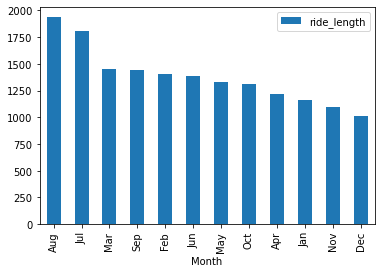

In [27]:
#lets see the monthly average ride length
monthly_ride=all_trips.pivot_table(values="ride_length", index=['Month'],aggfunc="mean").sort_values('ride_length', ascending=False)
monthly_ride
monthly_ride.plot(kind='bar');
plt.xticks(rotation=90);

From the graph it shows August is month most rider do spend more time riding followed by:
**July,March,September,Febuary,June....**

### The monthly average ride length with respect to member subscribtion

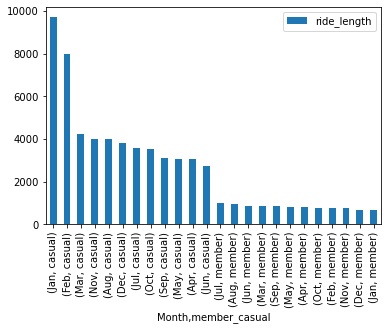

In [28]:
#lets see the monthly average ride length with respect to member subscribtion
monthly_sub_ride=all_trips.pivot_table(values="ride_length", index=['Month','member_casual'],aggfunc="mean").sort_values('ride_length', ascending=False)
monthly_sub_ride
monthly_sub_ride.plot(kind='bar');
plt.xticks(rotation=90);

Evident from the graph,With **Casual** riders,the highest average time spend on riding is in January,but with **Member** riders, the highest average time spend on riding is in July.

###  Week Day average ride_length 

In [30]:
# lets convert Date to DatetimeIndex
all_trips['Date'] = pd.DatetimeIndex(all_trips['Date'])


#create a new column day_of_week to store the names of day of the week
all_trips['day_of_week']= all_trips['Date'].dt.day_name()

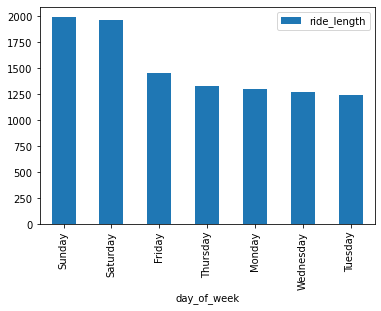

In [31]:
weekday_ride=all_trips.pivot_table(values="ride_length",    index=['day_of_week'],aggfunc="mean").sort_values('ride_length', ascending=False)
weekday_ride.plot(kind='bar')

From the graph,the amount of time spend on riding is usually high on **Sunday & Saturday** repectivly on he average.

###  Weekly average ride_lenghth with respect to membership(casual & member)

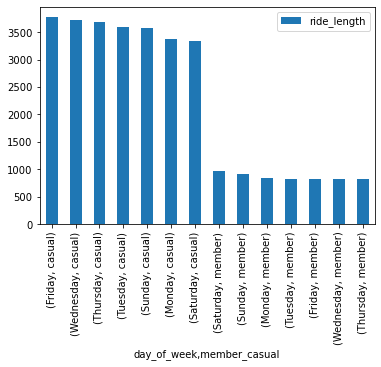

In [32]:
weekly_ride=all_trips.pivot_table(values="ride_length",    index=['day_of_week','member_casual'],aggfunc="mean").sort_values('ride_length', ascending=False)
weekly_ride.plot(kind='bar')

According to the graph,**Casual** riders mostly spend moretime riding on the bikes on friday,wednesday and thurdays.But **Member** riders spend moretime riding on weekends then monday.

It is worth noting that from the previous average ride lenghth graph which shows **saturdays and sundays** with highest time riders spend riding,it is most likely to be impacted by **Member** riders.This is evident from the graph above that has  weekends has the highest amount of time spend on riding by **Member**  riders. Also from the graph casual riders have **friday** has day most **casual** riders spend more time which influences the previous graph where **friday** is **3rd** on the average time spent on bikes.

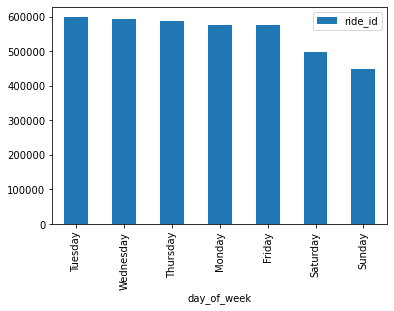

In [34]:
weekly_count=all_trips.pivot_table(values="ride_id",    index=['day_of_week'],aggfunc="count").sort_values('ride_id', ascending=False)
weekly_count.plot(kind='bar')

from the graph,**Tuesday,Wednesday** appears  to be the highest days where most people actually take rides.

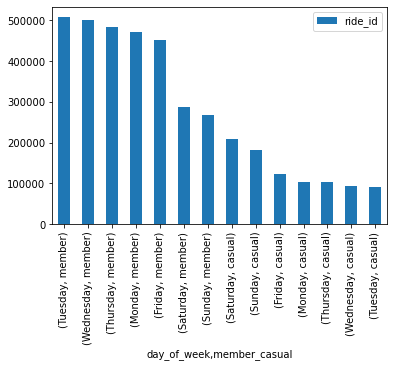

In [35]:
weekly_count=all_trips.pivot_table(values="ride_id",    index=['day_of_week','member_casual'],aggfunc="count").sort_values('ride_id', ascending=False)
weekly_count.plot(kind='bar')

in terms of the graph,**member** takes more rides on Tuesday while less peoble take on Sunday and Saturday.
but **casual** more people take rides on Saturday and Sunday but less **casual** take on Tuesday.
this is sharp contrast between **member & casual** 

In [36]:
all_trips.groupby(['day_of_week'])['ride_length'].count()

day_of_week
Friday       575194
Monday       575492
Saturday     497501
Sunday       449257
Thursday     586857
Tuesday      598955
Wednesday    592786
Name: ride_length, dtype: int64

In [ ]:
all_trips

## ACT PHASE

1.What is your final conclusion based on your analysis?
2.How could your team and business apply your insights? 
3.What next steps would you or your stakeholders take based on your findings? 
4.Is there additional data you could use to expand on your findings?

####  1. How do annual members and casual riders use Cyclistic bikes differently?

From the analysis and visualization,we were able to monitor the and as well as differentiate between casual and member riders.According to the graph,**Casual** riders mostly spend moretime riding on the bikes on friday,wednesday and thurdays.But **Member** riders spend moretime riding on weekends then monday.But on a general riders do spend more time ridng on  weekends.
Also with analysis based on monthly usage;the following observation was made:From the graph it shows **August** is month most riders  spend more time riding followed by: July,March,September,Febuary,June.
furthermore with respect types of riders with to it is evident from the graph,With Casual riders,the highest average time spend on riding is in **January**,but with Member riders, the highest average time spend on riding is in **July**.

#### 2. Why would casual riders buy Cyclistic annual memberships? 
From the analysis,use the daily to help convert casual riders to member riders,we see casual rider hence wedesign attractive packages for casual users that become member riders.Discount should be offered to casual riders that 


#### 3. How can Cyclistic use digital media to influence casual riders to become members?
use the monthly data to plan towards seasonal periods.This because we know the months that have highest average time that is spent ,hence we will know when to run campaigns to attract potential riders.Also sice the general amount of time increases on weekend 